In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import copy
import seaborn as sns

## Introductory Setup

In [11]:
ind = {0:'S1', 1:'S2', 2:'M1',3:'C1'}

0, 1, 2, 3 represents ['S1', 'S2', 'M1', 'C1'] in order

In [12]:
N = pd.DataFrame([[0,0,1,0],[0,0,1,0],[1,1,0,1],[0,0,1,0]], index= [0,1,2,3], columns = [0,1,2,3])
N

,0,1,2,3
0,0,0,1,0
1,0,0,1,0
2,1,1,0,1
3,0,0,1,0


In [13]:
D = pd.DataFrame([[0,0,1508,0],[0,0,807,0],[1508,807,0,167],[0,0,167,0]],  index= [0,1,2,3], columns = [0,1,2,3])
D

,0,1,2,3
0,0,0,1508,0
1,0,0,807,0
2,1508,807,0,167
3,0,0,167,0


In [14]:
F =  pd.DataFrame([[0,0,8,0],[0,0,5,0],[8,5,0,6],[0,0,6,0]],  index= [0,1,2,3], columns = [0,1,2,3])
F

,0,1,2,3
0,0,0,8,0
1,0,0,5,0
2,8,5,0,6
3,0,0,6,0


In [15]:
S1toM1= ['18:35','21:27','19:46','26:25','28:36','20:28','32:16','22:10']
S2toM1= ['16:25','19:38','20:56','09:13','12:08']
M1toC1= ['03:42','02:56','04:15','03:18','05:08','03:50']

In [16]:
#create list for Travel Time Matrix
import copy

TT = []
for i in range(4):
  TT.append([None for j in range(4)])

TT[0][2]=(['18:35','21:27','19:46','26:25','28:36','20:28','32:16','22:10'])
TT[1][2]=(['16:25','19:38','20:56','09:13','12:08'])
TT[2][3]=(['03:42','02:56','04:15','03:18','05:08','03:50'])

for i in range(4):
  for j in range(4):
    if TT[i][j] == None:
      TT[i][j] = copy.deepcopy(TT[j][i])

for line in TT:
  print(line)

[None, None, ['18:35', '21:27', '19:46', '26:25', '28:36', '20:28', '32:16', '22:10'], None]
[None, None, ['16:25', '19:38', '20:56', '09:13', '12:08'], None]
[['18:35', '21:27', '19:46', '26:25', '28:36', '20:28', '32:16', '22:10'], ['16:25', '19:38', '20:56', '09:13', '12:08'], None, ['03:42', '02:56', '04:15', '03:18', '05:08', '03:50']]
[None, None, ['03:42', '02:56', '04:15', '03:18', '05:08', '03:50'], None]


In [17]:
TT[2][3][5]

'03:50'

In [18]:
#creating departure time matrix for train from i to j

dep = []
for i in range(4):
  dep.append([None for j in range(4)])

dep[0][2] = (['16:30', '14:40', '03:55', '01:25', '10:26', '12:25', '06:35', '20:15'])
dep[2][0] =  ['18:25', '06:20', '02:25', '05:15', '09:20', '15:15', '20:18', '22:20']
dep[1][2] = ['04:20', '08:35', '12:15', '18:12', '22:18']
dep[2][1] = ['12:25', '15:16', '18:21', '07:25', '21:20']
dep[2][3] =  ['05:50', '10:25', '12:30', '18:15', '21:05', '16:20']
dep[3][2] = ['04:00', '07:15', '10:55', '18:35', '21:25', '23:50']


In [19]:
for line in dep:
  print(line)

[None, None, ['16:30', '14:40', '03:55', '01:25', '10:26', '12:25', '06:35', '20:15'], None]
[None, None, ['04:20', '08:35', '12:15', '18:12', '22:18'], None]
[['18:25', '06:20', '02:25', '05:15', '09:20', '15:15', '20:18', '22:20'], ['12:25', '15:16', '18:21', '07:25', '21:20'], None, ['05:50', '10:25', '12:30', '18:15', '21:05', '16:20']]
[None, None, ['04:00', '07:15', '10:55', '18:35', '21:25', '23:50'], None]


##Scenario A

Scenario A: Creating DataFrames
1. You are given above the travel and departure times for each type of train on each network link. Identify
the Arrival Time for the above trains. Also, create a dataframe using the above data for Arrival and
Departure with the row as From-station and the column as To-station.
2. Execute a code to create an Arrival-Departure Board for all the nodes based on the above-given data
set.
Note 1
: While creating dataframe for Arrival-Departure Board each train must be named for identification. For more details, refer to the footnote given below.

In [ ]:
#departure data frame can create as follows:
depdf = pd.DataFrame(dep, index= [ind[k] for k in range(4)], columns =[ind[k] for k in range(4)])
depdf

,S1,S2,M1,C1
S1,None,None,"[16:30, 14:40, 03:55, 01:25, 10:26, 12:25, 06:...",None
S2,None,None,"[04:20, 08:35, 12:15, 18:12, 22:18]",None
M1,"[18:25, 06:20, 02:25, 05:15, 09:20, 15:15, 20:...","[12:25, 15:16, 18:21, 07:25, 21:20]",None,"[05:50, 10:25, 12:30, 18:15, 21:05, 16:20]"
C1,None,None,"[04:00, 07:15, 10:55, 18:35, 21:25, 23:50]",None


In [ ]:
# to create arrival data frame we need some functions to add the time:


def timeconvert(t):
  a, b = map(int, list(t.split(':')))
  timeinminutes = a*60 + b
  return timeinminutes

def reconvert(mins):
  res = mins%(24*60)
  hour = res//60
  mins = res%60
  s = str(hour).rjust(2,'0')+':'+str(mins).rjust(2,'0')
  return s

def addtime(t1, t2):
  newtime = timeconvert(t1) + timeconvert(t2)
  return reconvert(newtime)

arrv = []
for i in range(4):
  arrv.append([None for j in range(4)])

for i in range(4):
  for j in range(4):
    if dep[i][j] != None:
      arrv[i][j] = []
      for k in range(F[i][j]):
        arrv[i][j].append(addtime(dep[i][j][k], TT[i][j][k]))


In [ ]:
for line in dep:
  print(line)
print('---------------------------------------------------------------------------------------------')
for line in TT:
  print(line)
print('---------------------------------------------------------------------------------------------')
for line in arrv:
  print(line)

[None, None, ['16:30', '14:40', '03:55', '01:25', '10:26', '12:25', '06:35', '20:15'], None]
[None, None, ['04:20', '08:35', '12:15', '18:12', '22:18'], None]
[['18:25', '06:20', '02:25', '05:15', '09:20', '15:15', '20:18', '22:20'], ['12:25', '15:16', '18:21', '07:25', '21:20'], None, ['05:50', '10:25', '12:30', '18:15', '21:05', '16:20']]
[None, None, ['04:00', '07:15', '10:55', '18:35', '21:25', '23:50'], None]
---------------------------------------------------------------------------------------------
[None, None, ['18:35', '21:27', '19:46', '26:25', '28:36', '20:28', '32:16', '22:10'], None]
[None, None, ['16:25', '19:38', '20:56', '09:13', '12:08'], None]
[['18:35', '21:27', '19:46', '26:25', '28:36', '20:28', '32:16', '22:10'], ['16:25', '19:38', '20:56', '09:13', '12:08'], None, ['03:42', '02:56', '04:15', '03:18', '05:08', '03:50']]
[None, None, ['03:42', '02:56', '04:15', '03:18', '05:08', '03:50'], None]
----------------------------------------------------------------------

In [ ]:
#arrival data frame can be created as follows:
arrdf = pd.DataFrame(arrv, index= [ind[k] for k in range(4)], columns =[ind[k] for k in range(4)])
arrdf

,S1,S2,M1,C1
S1,None,None,"[11:05, 12:07, 23:41, 03:50, 15:02, 08:53, 14:...",None
S2,None,None,"[20:45, 04:13, 09:11, 03:25, 10:26]",None
M1,"[13:00, 03:47, 22:11, 07:40, 13:56, 11:43, 04:...","[04:50, 10:54, 15:17, 16:38, 09:28]",None,"[09:32, 13:21, 16:45, 21:33, 02:13, 20:10]"
C1,None,None,"[07:42, 10:11, 15:10, 21:53, 02:33, 03:40]",None


In [ ]:
depdf

,S1,S2,M1,C1
S1,None,None,"[16:30, 14:40, 03:55, 01:25, 10:26, 12:25, 06:...",None
S2,None,None,"[04:20, 08:35, 12:15, 18:12, 22:18]",None
M1,"[18:25, 06:20, 02:25, 05:15, 09:20, 15:15, 20:...","[12:25, 15:16, 18:21, 07:25, 21:20]",None,"[05:50, 10:25, 12:30, 18:15, 21:05, 16:20]"
C1,None,None,"[04:00, 07:15, 10:55, 18:35, 21:25, 23:50]",None


In [ ]:
#creating ARRIVAL DEPARTURE BOARD
board = []

def createtitle(d, a, i, j):
  return d+'_'+ind[i]+ind[j]+'_'+a

for i in range(4):
  for j in range(4):
    if dep[i][j] != None:
      for k in range(F[i][j]):
        title = createtitle(dep[i][j][k], arrv[i][j][k], i, j)
        board.append(title)

for line in board:
  print(line)

16:30_S1M1_11:05
14:40_S1M1_12:07
03:55_S1M1_23:41
01:25_S1M1_03:50
10:26_S1M1_15:02
12:25_S1M1_08:53
06:35_S1M1_14:51
20:15_S1M1_18:25
04:20_S2M1_20:45
08:35_S2M1_04:13
12:15_S2M1_09:11
18:12_S2M1_03:25
22:18_S2M1_10:26
18:25_M1S1_13:00
06:20_M1S1_03:47
02:25_M1S1_22:11
05:15_M1S1_07:40
09:20_M1S1_13:56
15:15_M1S1_11:43
20:18_M1S1_04:34
22:20_M1S1_20:30
12:25_M1S2_04:50
15:16_M1S2_10:54
18:21_M1S2_15:17
07:25_M1S2_16:38
21:20_M1S2_09:28
05:50_M1C1_09:32
10:25_M1C1_13:21
12:30_M1C1_16:45
18:15_M1C1_21:33
21:05_M1C1_02:13
16:20_M1C1_20:10
04:00_C1M1_07:42
07:15_C1M1_10:11
10:55_C1M1_15:10
18:35_C1M1_21:53
21:25_C1M1_02:33
23:50_C1M1_03:40


##Scenario B

Scenario B: Scheduling Intersection

Note 2
: While providing an output of a feasible itinerary, you need to use an approach similar to the
elementary set theory; for more details, refer to the footnote below.

1. A layover in our context significantly differs from the waiting time at the meeting point. Layover
is when both parties come separately and wait for the next leg of the journey. At the same time,
waiting time here refers to either of the parties reaching early at the meeting point and waiting for the
other party. Create a plot for feasible trains arriving at the meeting point M1 arriving from {S1, S2}
against the possible number of feasible departures for C1 with a minimum layover time {1, 2, 5} hours.
Describe your obtained plot based on your understanding. Also, report your feasible travel plan using
the prescribed notation.
2. Assume that your tour planning is now constrained by waiting time at meeting point M1 say, waiting
time not more {1.5, 2.5} hours. You can continue to assume a minimum layover time of {1, 2, 5} hours.
Plot your feasible set of trains from the source nodes {S1, S2} against departing trains at M1 to C1
with required layovers and waiting time. Describe your obtained plot based on your understanding.
Also, report your feasible travel plan using the prescribed notation.

Hint: Try to use a heatmap as a plot!!

In [ ]:
#minimum layover time 1hr (assuming the feasible train from m1 to c1 must be in the same day)
def maximumtime(t1, t2):
  s1 = timeconvert(t1)
  s2 = timeconvert(t2)
  if s2 >= s1:
    return t2
  else: return t1

feasibletrains = []

for s1trainno,s1trainarr in enumerate(arrdf.loc['S1', 'M1']):
  for s2trainno, s2trainarr in enumerate(arrdf.loc['S2', 'M1']):
    if maximumtime(s1trainarr, s2trainarr) == s1trainarr:
      moveovertime = timeconvert(reconvert(timeconvert(s1trainarr)+60))
      for m1trainno, m1traindep in enumerate(depdf.loc['M1', 'C1']):
        if timeconvert(m1traindep) > moveovertime:
          feasibletrains.append([s1trainno, s2trainno, m1trainno])
    else:
      moveovertime = timeconvert(reconvert(timeconvert(s2trainarr)+60))
      for m1trainno, m1traindep in enumerate(depdf.loc['M1', 'C1']):
        if timeconvert(m1traindep) > moveovertime:
          feasibletrains.append([s1trainno, s2trainno, m1trainno])

feasibles = []
prev0, prev1, prev2 = feasibletrains[0]
sublist = [prev2]
for a,b,c in feasibletrains[1:]:
  if (a==prev0) and (b==prev1):
    sublist.append(c)
  else:
    feasibles.append([prev0, prev1, copy.deepcopy(sublist)])
    sublist.clear()
    sublist.append(c)
  prev0 = a
  prev1 = b
layovertrains  = []
layovertrains.append(len(feasibles))
feasibles

[[0, 1, [2, 3, 4, 5]],
 [0, 2, [2, 3, 4, 5]],
 [0, 3, [2, 3, 4, 5]],
 [0, 4, [2, 3, 4, 5]],
 [1, 1, [3, 4, 5]],
 [1, 2, [3, 4, 5]],
 [1, 3, [3, 4, 5]],
 [1, 4, [3, 4, 5]],
 [2, 0, [0, 1, 2, 3, 4, 5]],
 [2, 1, [0, 1, 2, 3, 4, 5]],
 [2, 2, [0, 1, 2, 3, 4, 5]],
 [2, 3, [0, 1, 2, 3, 4, 5]],
 [2, 4, [0, 1, 2, 3, 4, 5]],
 [3, 1, [0, 1, 2, 3, 4, 5]],
 [3, 2, [1, 2, 3, 4, 5]],
 [3, 3, [0, 1, 2, 3, 4, 5]],
 [3, 4, [2, 3, 4, 5]],
 [4, 1, [3, 4, 5]],
 [4, 2, [3, 4, 5]],
 [4, 3, [3, 4, 5]],
 [4, 4, [3, 4, 5]],
 [5, 1, [1, 2, 3, 4, 5]],
 [5, 2, [1, 2, 3, 4, 5]],
 [5, 3, [1, 2, 3, 4, 5]],
 [5, 4, [2, 3, 4, 5]],
 [6, 1, [3, 4, 5]],
 [6, 2, [3, 4, 5]],
 [6, 3, [3, 4, 5]],
 [6, 4, [3, 4, 5]],
 [7, 1, [4]],
 [7, 2, [4]],
 [7, 3, [4]]]

Text(0.5, 1.0, 'Feasible Trains from M1 to C1 for 1hr Layover')

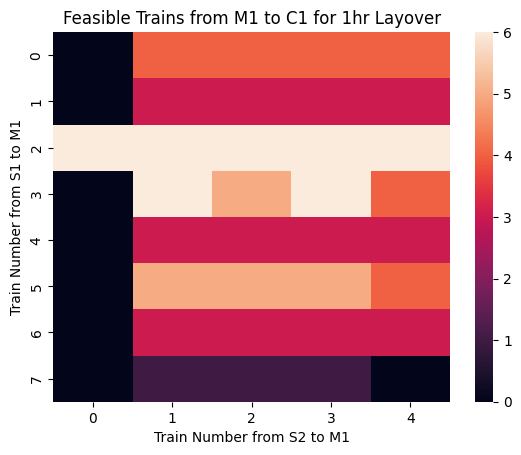

In [ ]:
h=np.zeros((len(arrdf.loc['S1','M1']), len(arrdf.loc['S2','M1'])))

g = [i for i in range(len(arrdf.loc['S1','M1']))]
k =[i for i in range(len(arrdf.loc['S2','M1']))]
import seaborn as sns

df1hr = pd.DataFrame(h, index = g, columns =k )
df1hr
for a,b,ls in feasibles:
  df1hr.loc[a][b] = len(ls)
sns.heatmap(df1hr)
plt.xlabel("Train Number from S2 to M1")
plt.ylabel('Train Number from S1 to M1')
plt.title("Feasible Trains from M1 to C1 for 1hr Layover")

In [ ]:
#minimum layover time 2hr (assuming the feasible train from m1 to c1 must be in the same day)

feasibletrains = []

for s1trainno,s1trainarr in enumerate(arrdf.loc['S1', 'M1']):
  for s2trainno, s2trainarr in enumerate(arrdf.loc['S2', 'M1']):
    if maximumtime(s1trainarr, s2trainarr) == s1trainarr:
      moveovertime = timeconvert(reconvert(timeconvert(s1trainarr)+120))
      for m1trainno, m1traindep in enumerate(depdf.loc['M1', 'C1']):
        if timeconvert(m1traindep) > moveovertime:
          feasibletrains.append([s1trainno, s2trainno, m1trainno])
    else:
      moveovertime = timeconvert(reconvert(timeconvert(s2trainarr)+120))
      for m1trainno, m1traindep in enumerate(depdf.loc['M1', 'C1']):
        if timeconvert(m1traindep) > moveovertime:
          feasibletrains.append([s1trainno, s2trainno, m1trainno])

feasibles = []
prev0, prev1, prev2 = feasibletrains[0]
sublist = [prev2]
for a,b,c in feasibletrains[1:]:
  if (a==prev0) and (b==prev1):
    sublist.append(c)
  else:
    feasibles.append([prev0, prev1, copy.deepcopy(sublist)])
    sublist.clear()
    sublist.append(c)
  prev0 = a
  prev1 = b
layovertrains  = []
layovertrains.append(len(feasibles))
feasibles

[[0, 1, [3, 4, 5]],
 [0, 2, [3, 4, 5]],
 [0, 3, [3, 4, 5]],
 [0, 4, [3, 4, 5]],
 [1, 1, [3, 4, 5]],
 [1, 2, [3, 4, 5]],
 [1, 3, [3, 4, 5]],
 [1, 4, [3, 4, 5]],
 [2, 0, [0, 1, 2, 3, 4, 5]],
 [2, 1, [0, 1, 2, 3, 4, 5]],
 [2, 2, [0, 1, 2, 3, 4, 5]],
 [2, 3, [0, 1, 2, 3, 4, 5]],
 [2, 4, [0, 1, 2, 3, 4, 5]],
 [3, 1, [1, 2, 3, 4, 5]],
 [3, 2, [2, 3, 4, 5]],
 [3, 3, [1, 2, 3, 4, 5]],
 [3, 4, [2, 3, 4, 5]],
 [4, 1, [3, 4]],
 [4, 2, [3, 4]],
 [4, 3, [3, 4]],
 [4, 4, [3, 4]],
 [5, 1, [2, 3, 4, 5]],
 [5, 2, [2, 3, 4, 5]],
 [5, 3, [2, 3, 4, 5]],
 [5, 4, [2, 3, 4, 5]],
 [6, 1, [3, 4]],
 [6, 2, [3, 4]],
 [6, 3, [3, 4]],
 [6, 4, [3, 4]],
 [7, 1, [4]],
 [7, 2, [4]],
 [7, 3, [4]]]

Text(0.5, 1.0, 'Feasible Trains from M1 to C1 for 2hr Layover')

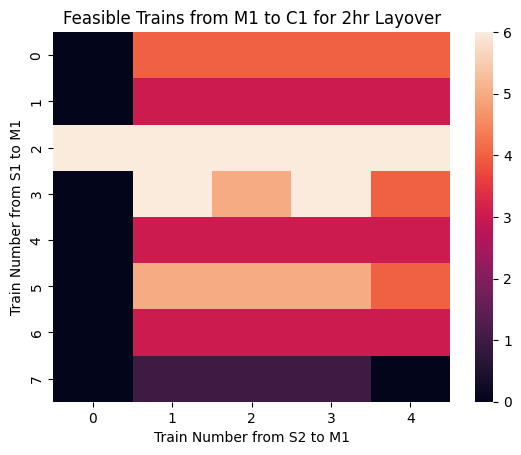

In [ ]:
h=np.zeros((len(arrdf.loc['S1','M1']), len(arrdf.loc['S2','M1'])))

g = [i for i in range(len(arrdf.loc['S1','M1']))]
k =[i for i in range(len(arrdf.loc['S2','M1']))]
import seaborn as sns

df2hr = pd.DataFrame(h, index = g, columns =k )
df2hr
for a,b,ls in feasibles:
  df2hr.loc[a][b] = len(ls)
sns.heatmap(df1hr)
plt.xlabel("Train Number from S2 to M1")
plt.ylabel('Train Number from S1 to M1')
plt.title("Feasible Trains from M1 to C1 for 2hr Layover")

In [ ]:
#minimum layover time 5hr (assuming the feasible train from m1 to c1 must be in the same day)

feasibletrains = []

for s1trainno,s1trainarr in enumerate(arrdf.loc['S1', 'M1']):
  for s2trainno, s2trainarr in enumerate(arrdf.loc['S2', 'M1']):
    if maximumtime(s1trainarr, s2trainarr) == s1trainarr:
      moveovertime = timeconvert(reconvert(timeconvert(s1trainarr)+300))
      for m1trainno, m1traindep in enumerate(depdf.loc['M1', 'C1']):
        if timeconvert(m1traindep) > moveovertime:
          feasibletrains.append([s1trainno, s2trainno, m1trainno])
    else:
      moveovertime = timeconvert(reconvert(timeconvert(s2trainarr)+300))
      for m1trainno, m1traindep in enumerate(depdf.loc['M1', 'C1']):
        if timeconvert(m1traindep) > moveovertime:
          feasibletrains.append([s1trainno, s2trainno, m1trainno])

feasibles = []
prev0, prev1, prev2 = feasibletrains[0]
sublist = [prev2]
for a,b,c in feasibletrains[1:]:
  if (a==prev0) and (b==prev1):
    sublist.append(c)
  else:
    feasibles.append([prev0, prev1, copy.deepcopy(sublist)])
    sublist.clear()
    sublist.append(c)
  prev0 = a
  prev1 = b
layovertrains  = []
layovertrains.append(len(feasibles))
feasibles

[[0, 0, [0, 1, 2, 3, 4, 5]],
 [0, 1, [3, 4, 5]],
 [0, 2, [3, 4, 5]],
 [0, 3, [3, 4, 5]],
 [0, 4, [3, 4, 5]],
 [1, 0, [0, 1, 2, 3, 4, 5]],
 [1, 1, [3, 4]],
 [1, 2, [3, 4]],
 [1, 3, [3, 4]],
 [1, 4, [3, 4]],
 [2, 0, [0, 1, 2, 3, 4, 5]],
 [2, 1, [0, 1, 2, 3, 4, 5]],
 [2, 2, [0, 1, 2, 3, 4, 5]],
 [2, 3, [0, 1, 2, 3, 4, 5]],
 [2, 4, [0, 1, 2, 3, 4, 5]],
 [3, 0, [0, 1, 2, 3, 4, 5]],
 [3, 1, [1, 2, 3, 4, 5]],
 [3, 2, [3, 4, 5]],
 [3, 3, [1, 2, 3, 4, 5]],
 [3, 4, [3, 4, 5]],
 [4, 0, [0, 1, 2, 3, 4, 5]],
 [4, 1, [4]],
 [4, 2, [4]],
 [4, 3, [4]],
 [4, 4, [4]],
 [5, 0, [0, 1, 2, 3, 4, 5]],
 [5, 1, [3, 4, 5]],
 [5, 2, [3, 4, 5]],
 [5, 3, [3, 4, 5]],
 [5, 4, [3, 4, 5]],
 [6, 0, [0, 1, 2, 3, 4, 5]],
 [6, 1, [4]],
 [6, 2, [4]],
 [6, 3, [4]],
 [6, 4, [4]]]

Text(0.5, 1.0, 'Feasible Trains from M1 to C1 for 5hr Layover')

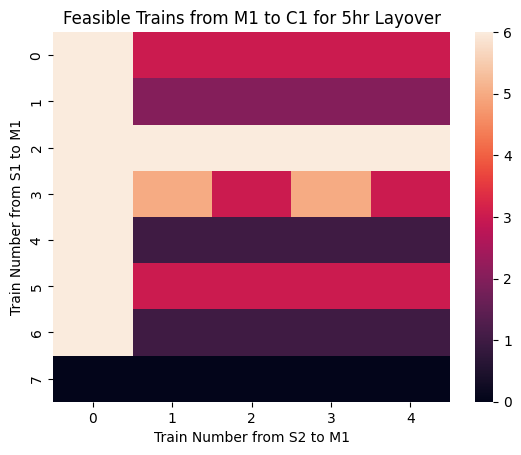

In [ ]:
h=np.zeros((len(arrdf.loc['S1','M1']), len(arrdf.loc['S2','M1'])))

g = [i for i in range(len(arrdf.loc['S1','M1']))]
k =[i for i in range(len(arrdf.loc['S2','M1']))]
import seaborn as sns

df5hr = pd.DataFrame(h, index = g, columns =k )
df5hr
for a,b,ls in feasibles:
  df5hr.loc[a][b] = len(ls)
sns.heatmap(df5hr)
plt.xlabel("Train Number from S2 to M1")
plt.ylabel('Train Number from S1 to M1')
plt.title("Feasible Trains from M1 to C1 for 5hr Layover")

Plot for Waiting Times Included

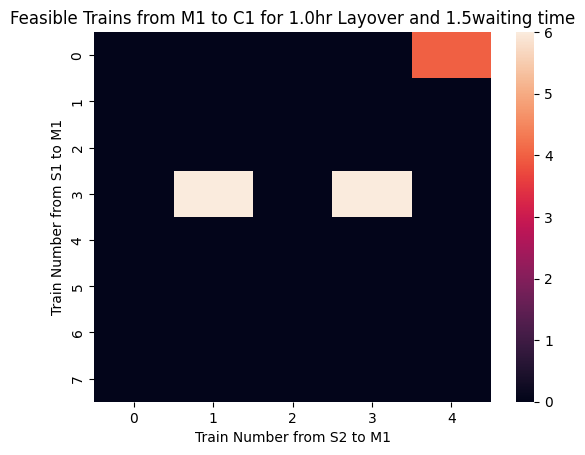

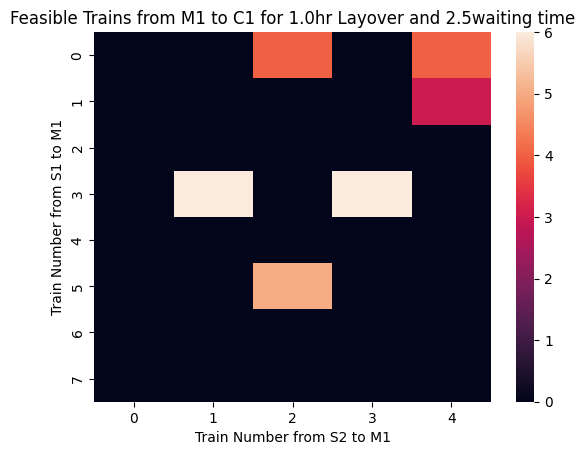

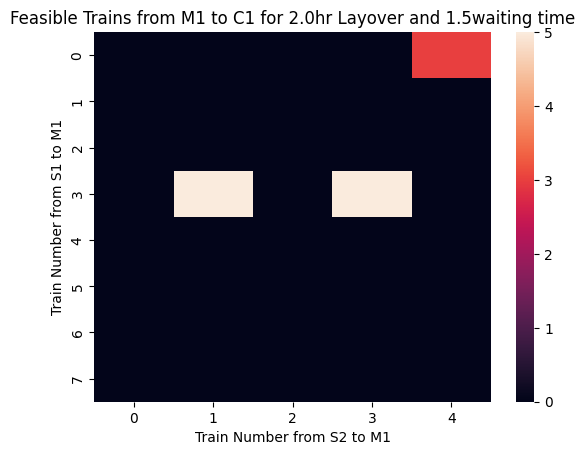

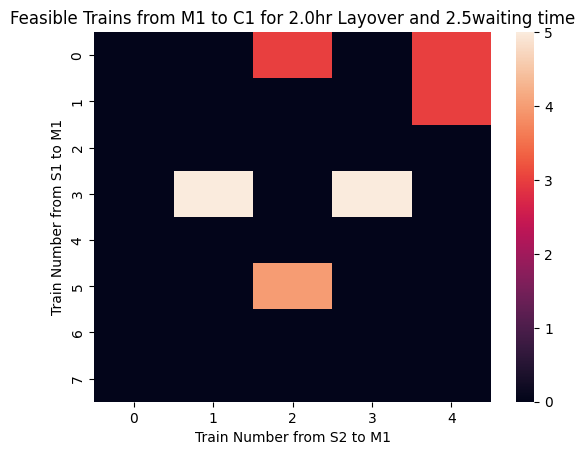

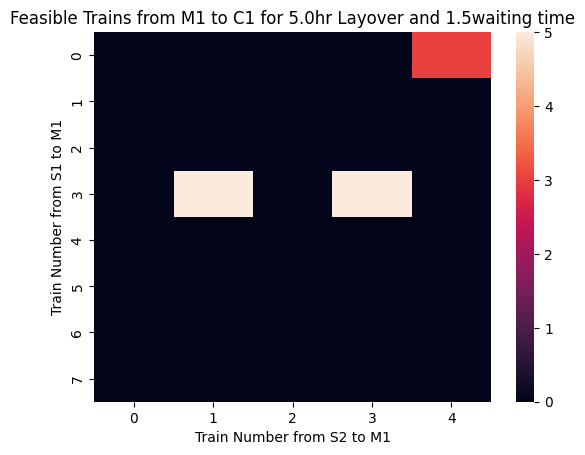

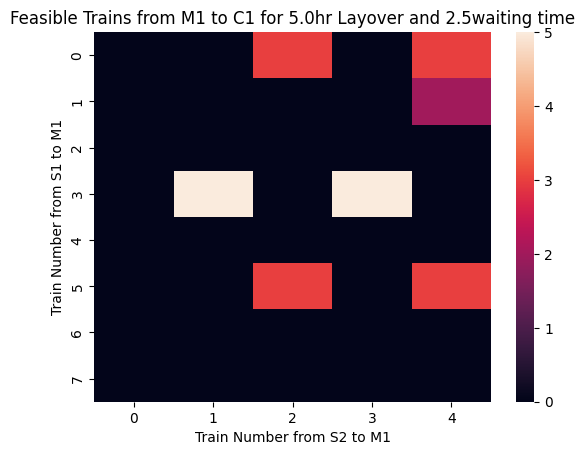

In [ ]:
#minimum layover time 1hr and waiting time not more than 1.5 hr (assuming the feasible train from m1 to c1 must be in the same day)
def maximumtime(t1, t2):
  s1 = timeconvert(t1)
  s2 = timeconvert(t2)
  if s2 >= s1:
    return t2
  else: return t1

import seaborn as sns

def timediff(t1,t2):
  s1= timeconvert(t1)
  s2= timeconvert(t2)
  return abs(s1-s2)

lay = [60,120,300]
waiti = [90,150]
for layovertime in lay:
  for waittime in waiti:

    feasibletrains = []
    for s1trainno,s1trainarr in enumerate(arrdf.loc['S1', 'M1']):
      for s2trainno, s2trainarr in enumerate(arrdf.loc['S2', 'M1']):
        if (maximumtime(s1trainarr, s2trainarr) == s1trainarr) and (timediff(s1trainarr, s2trainarr) <= waittime):
          moveovertime = timeconvert(reconvert(timeconvert(s1trainarr)+layovertime))
          for m1trainno, m1traindep in enumerate(depdf.loc['M1', 'C1']):
            if timeconvert(m1traindep) > moveovertime:
              feasibletrains.append([s1trainno, s2trainno, m1trainno])
        elif (maximumtime(s1trainarr, s2trainarr) == s2trainarr) and (timediff(s1trainarr, s2trainarr) <= waittime):
          moveovertime = timeconvert(reconvert(timeconvert(s2trainarr)+layovertime))
          for m1trainno, m1traindep in enumerate(depdf.loc['M1', 'C1']):
            if timeconvert(m1traindep) > moveovertime:
              feasibletrains.append([s1trainno, s2trainno, m1trainno])

    feasibles = []
    prev0, prev1, prev2 = feasibletrains[0]
    sublist = [prev2]
    for a,b,c in feasibletrains[1:]:
      if (a==prev0) and (b==prev1):
        sublist.append(c)
      else:
        feasibles.append([prev0, prev1, copy.deepcopy(sublist)])
        sublist.clear()
        sublist.append(c)
      prev0 = a
      prev1 = b
    layovertrains  = []
    layovertrains.append(len(feasibles))
    feasibles
    h=np.zeros((len(arrdf.loc['S1','M1']), len(arrdf.loc['S2','M1'])))
    g = [i for i in range(len(arrdf.loc['S1','M1']))]
    k =[i for i in range(len(arrdf.loc['S2','M1']))]
    df = pd.DataFrame(h, index = g, columns =k )
    for a,b,ls in feasibles:
      df.loc[a][b] = len(ls)
    sns.heatmap(df)
    plt.xlabel("Train Number from S2 to M1")
    plt.ylabel('Train Number from S1 to M1')
    plt.title(f"Feasible Trains from M1 to C1 for {layovertime/60}hr Layover and {waittime/60}waiting time")
    plt.show()

##Scenario C:

Parting Ways
Assuming both passengers board the same train from C1 to return to their destinations for {S1, S2}, but
at M1 they part their respective ways. A layover for both passengers can be expected on return as well,
followed by a waiting time for passenger departing later from M1. In this scenario, a layover can be computed
as the time between the arrival of a train at M1 from C1 and the time of the first passenger departure.
Following layover time, a waiting time for other passenger starts, considering a maximum waiting time of
{1, 2, 4, 10, 15} hours for the other passenger at M1 can be expected. Based on the given waiting time for the
second passenger, plot the combination for feasible Out-bound trains from M1 to {S1, S2} against Inbound
trains from C1 to M1. Also, plot a heatmap(s) with one axis as an arrival from C1 to M1 and the other
axis as a feasible departure from M1 to {S1, S2}.

In [ ]:
arrdf.loc['C1']['M1']

['07:42', '10:11', '15:10', '21:53', '02:33', '03:40']

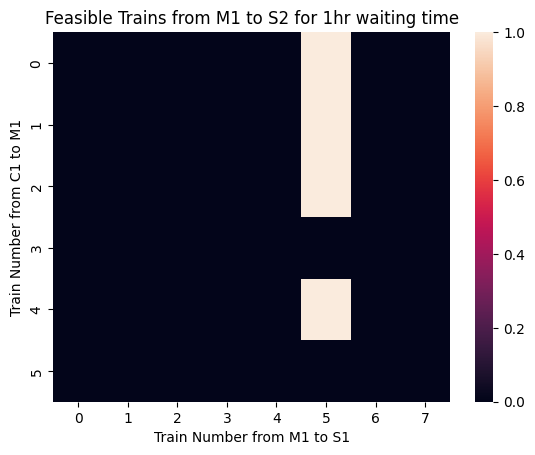

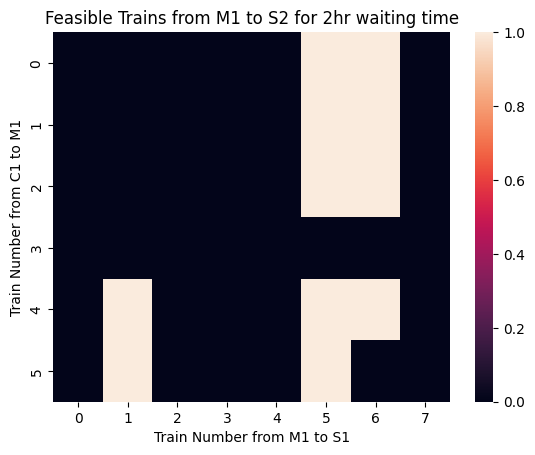

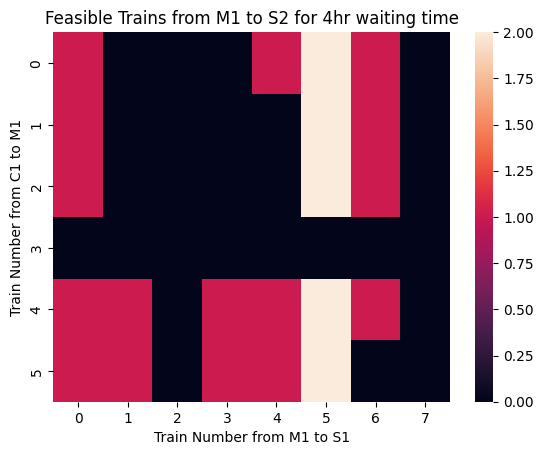

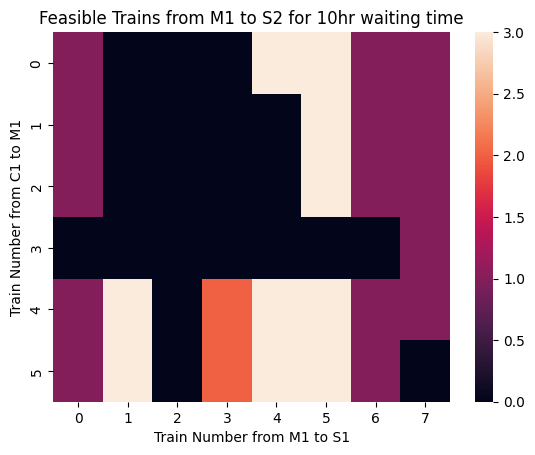

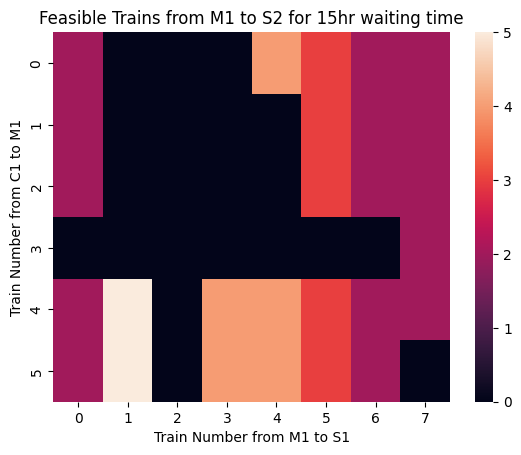

In [ ]:
def timediff(s2dep,s1dep):
  s1= timeconvert(s1dep)
  s2= timeconvert(s2dep)
  if s2 <= s1:
    s2+= 24*60
  return s2-s1


waitingtimes = [60, 120, 4*60, 10*60, 15*60]
#assume the first passenger leaves to S1 then

for waittime in waitingtimes:
  feasibletrains = []
  for c1trainno, c1trainarr in enumerate(arrdf.loc['C1','M1']):
    for s1trainno, s1traindep in enumerate(depdf.loc['M1','S1']):
      for s2trainno, s2traindep in enumerate(depdf.loc['M1','S2']):
        if (timeconvert(c1trainarr)<timeconvert(s1traindep)) and (timediff(s2traindep, s1traindep)<=waittime):
          feasibletrains.append([c1trainno, s1trainno, s2trainno])
  feasibles = []
  prev0, prev1, prev2 = feasibletrains[0]
  sublist = [prev2]
  for a,b,c in feasibletrains[1:]:
    if (a==prev0) and (b==prev1):
      sublist.append(c)
    else:
      feasibles.append([prev0, prev1, copy.deepcopy(sublist)])
      sublist.clear()
      sublist.append(c)
    prev0 = a
    prev1 = b
  layovertrains  = []
  layovertrains.append(len(feasibles))
  h=np.zeros((len(arrdf.loc['C1','M1']), len(depdf.loc['M1','S1'])))
  g = [i for i in range(len(arrdf.loc['C1','M1']))]
  k =[i for i in range(len(depdf.loc['M1','S1']))]
  df = pd.DataFrame(h, index = g, columns =k )
  for a,b,ls in feasibles:
    df.loc[a][b] = len(ls)
  sns.heatmap(df)
  plt.xlabel("Train Number from M1 to S1")
  plt.ylabel('Train Number from C1 to M1')
  plt.title(f"Feasible Trains from M1 to S2 for {int(waittime/60)}hr waiting time")
  plt.show()

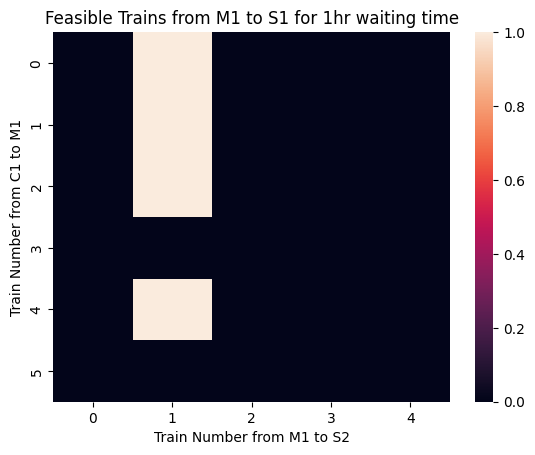

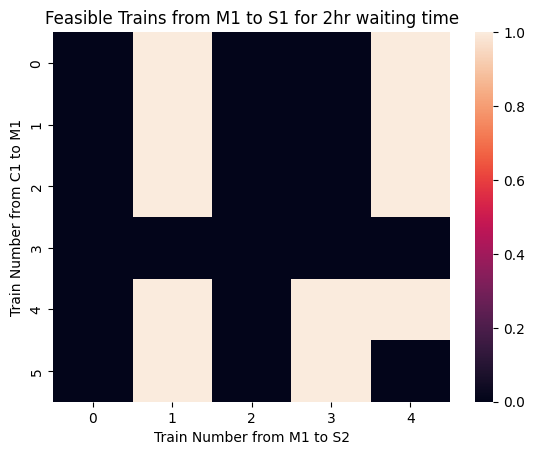

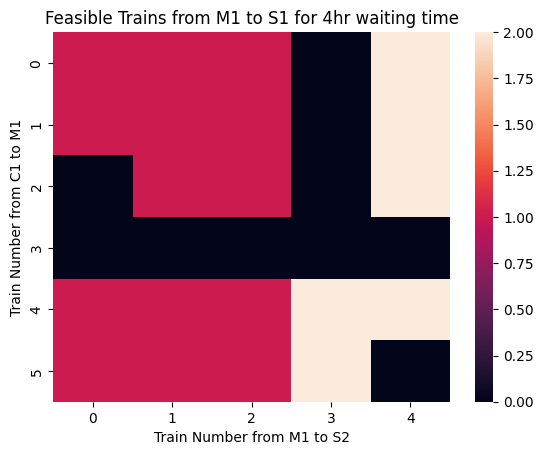

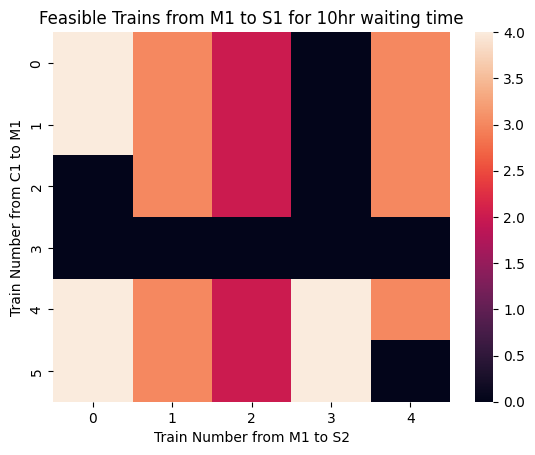

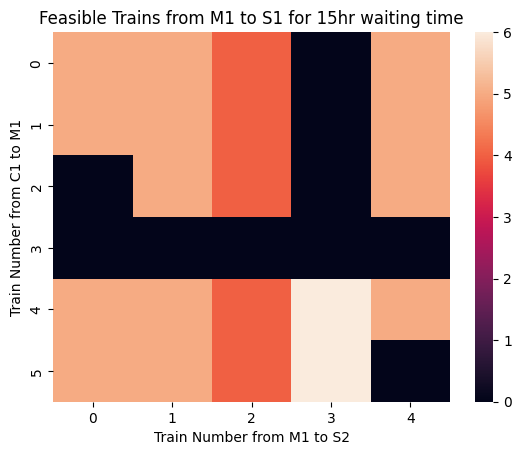

In [ ]:
def timediff(s1dep,s2dep):
  s1= timeconvert(s1dep)
  s2= timeconvert(s2dep)
  if s1<=s2:
    s1+= 24*60
  return s1-s2


waitingtimes = [60, 120, 4*60, 10*60, 15*60]
#assume the first passenger leaves to S2 then

for waittime in waitingtimes:
  feasibletrains = []
  for c1trainno, c1trainarr in enumerate(arrdf.loc['C1','M1']):
    for s2trainno, s2traindep in enumerate(depdf.loc['M1','S2']):
      for s1trainno, s1traindep in enumerate(depdf.loc['M1','S1']):
        if (timeconvert(c1trainarr)<timeconvert(s2traindep)) and (timediff(s2traindep, s1traindep)<=waittime):
          feasibletrains.append([c1trainno, s2trainno, s1trainno])
  feasibles = []
  prev0, prev1, prev2 = feasibletrains[0]
  sublist = [prev2]
  for a,b,c in feasibletrains[1:]:
    if (a==prev0) and (b==prev1):
      sublist.append(c)
    else:
      feasibles.append([prev0, prev1, copy.deepcopy(sublist)])
      sublist.clear()
      sublist.append(c)
    prev0 = a
    prev1 = b
  layovertrains  = []
  layovertrains.append(len(feasibles))
  h=np.zeros((len(arrdf.loc['C1','M1']), len(depdf.loc['M1','S2'])))
  g = [i for i in range(len(arrdf.loc['C1','M1']))]
  k =[i for i in range(len(depdf.loc['M1','S2']))]
  df = pd.DataFrame(h, index = g, columns =k )
  for a,b,ls in feasibles:
    df.loc[a][b] = len(ls)
  sns.heatmap(df)
  plt.xlabel("Train Number from M1 to S2")
  plt.ylabel('Train Number from C1 to M1')
  plt.title(f"Feasible Trains from M1 to S1 for {int(waittime/60)}hr waiting time")
  plt.show()